<a href="https://colab.research.google.com/github/alirasouli1994/image-processing/blob/main/bit_plane_decomposition_T2_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

Saving Fig3.13.jpg to Fig3.13.jpg


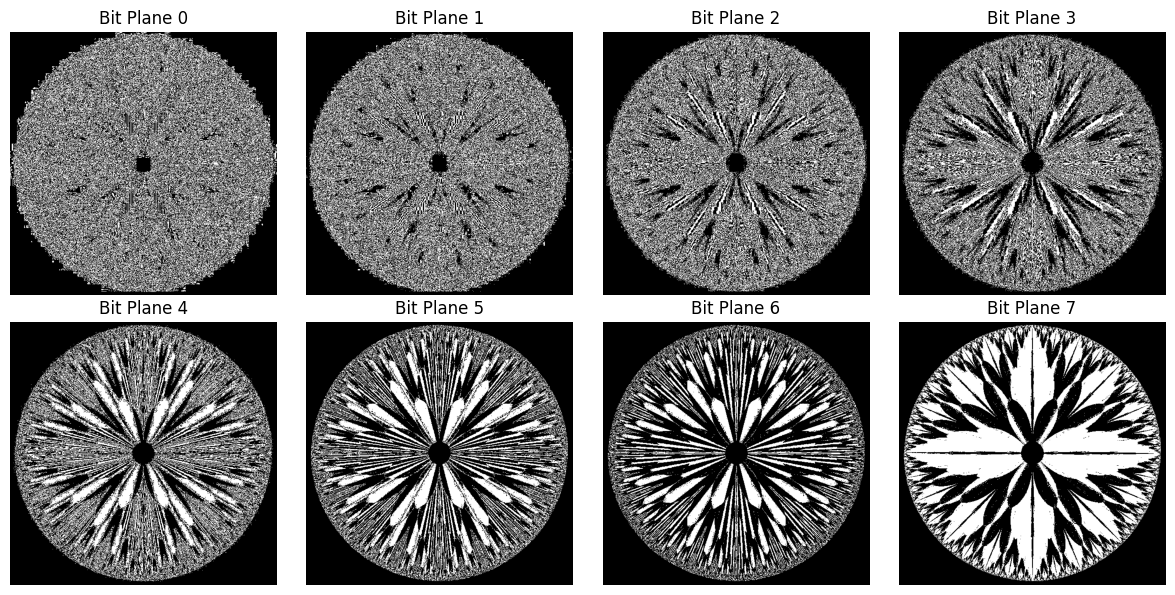

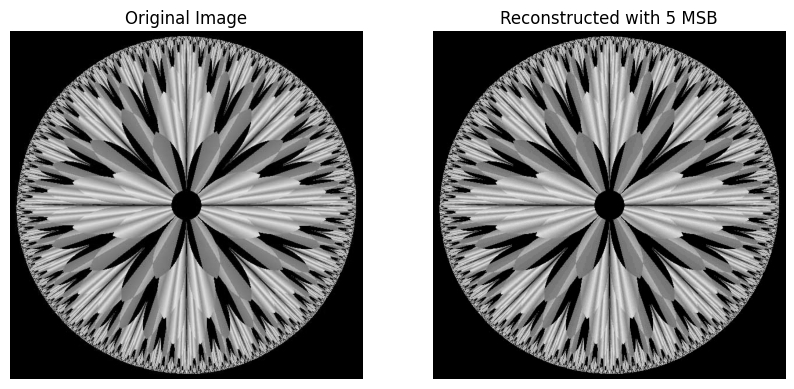

In [4]:
# تابع استخراج صفحات بیتی
def bit_plane_slicing(image):
    bit_planes = []
    for i in range(8):
        bit_plane = ((image >> i) & 1).astype(np.uint8) * 255  # تبدیل به uint8
        bit_planes.append(bit_plane)
    return bit_planes

# تجزیه به 8 صفحه بیت
bit_planes = bit_plane_slicing(image)

# نمایش صفحات بیتی
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# بازسازی تصویر با 5 صفحه بیت با ارزش‌ترین (بیت‌های 3 تا 7)
reconstructed_image = np.zeros_like(image, dtype=np.uint8)  # تغییر نوع داده به uint8
for i in range(3, 8):  # بیت‌های 3، 4، 5، 6 و 7
    reconstructed_image += ((bit_planes[i] // 255) * (1 << i)).astype(np.uint8)

# نمایش تصویر اصلی و بازسازی شده
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed with 5 MSB')
plt.axis('off')

plt.show()